Импортируем необходимые библиотеки:

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
# Загрузка данных
df = pd.read_csv('pokemon.csv')

Описание набора данных

In [24]:
# Вывод первых строк данных
print(df.head())

            Name  Total  HP  Attack  Defence  Sp_attack  Sp_defence  Speed
0      Bulbasaur    318  45      49       49         65          65     45
1        Ivysaur    405  60      62       63         80          80     60
2       Venusaur    525  80      82       83        100         100     80
3  Mega Venusaur    625  80     100      123        122         120     80
4     Charmander    309  39      52       43         60          50     65


### Описание признаков полей

Name - Имя покемона<br>
Total - Общая сила покемона<br>
HP - Очки здоровья<br>
Attack - Урон от атаки<br>
Defence - Защита от атак<br>
Sp_attack - Урон от спец атаки<br>
Sp_defence - Защита от спец атак<br>
Speed - Скорость<br>

In [25]:
# Основная информация о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1045 non-null   object
 1   Total       1045 non-null   int64 
 2   HP          1045 non-null   int64 
 3   Attack      1045 non-null   int64 
 4   Defence     1045 non-null   int64 
 5   Sp_attack   1045 non-null   int64 
 6   Sp_defence  1045 non-null   int64 
 7   Speed       1045 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 65.4+ KB
None


In [26]:
# Описание статистических характеристик
print(df.describe())

             Total           HP       Attack      Defence    Sp_attack  \
count  1045.000000  1045.000000  1045.000000  1045.000000  1045.000000   
mean    439.314833    70.067943    80.466986    74.661244    73.022010   
std     121.970701    26.671411    32.413665    31.237903    32.724797   
min     175.000000     1.000000     5.000000     5.000000    10.000000   
25%     330.000000    50.000000    55.000000    50.000000    50.000000   
50%     458.000000    68.000000    77.000000    70.000000    65.000000   
75%     515.000000    82.000000   100.000000    90.000000    95.000000   
max    1125.000000   255.000000   190.000000   250.000000   194.000000   

        Sp_defence        Speed  
count  1045.000000  1045.000000  
mean     72.288995    68.807656  
std      28.074148    30.210094  
min      20.000000     5.000000  
25%      50.000000    45.000000  
50%      70.000000    65.000000  
75%      90.000000    90.000000  
max     250.000000   200.000000  


Проверка пропущенных значений:

In [27]:
print(df.isnull().sum())

Name          0
Total         0
HP            0
Attack        0
Defence       0
Sp_attack     0
Sp_defence    0
Speed         0
dtype: int64


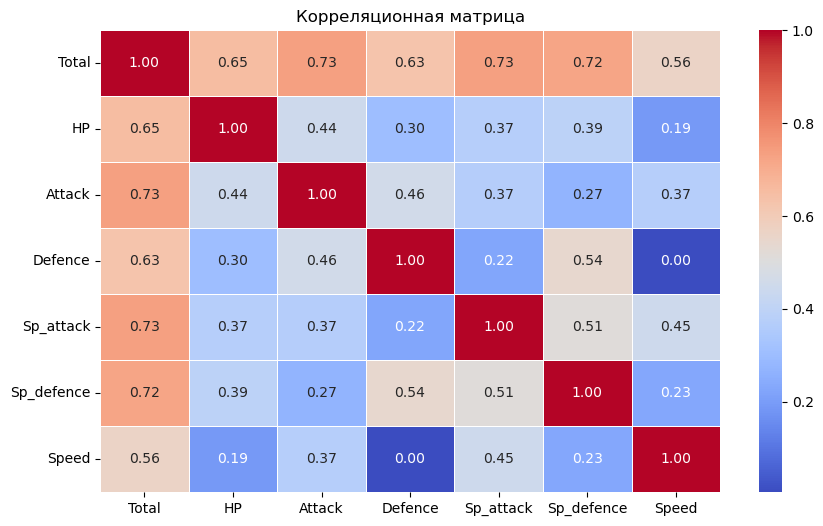

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['Name']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

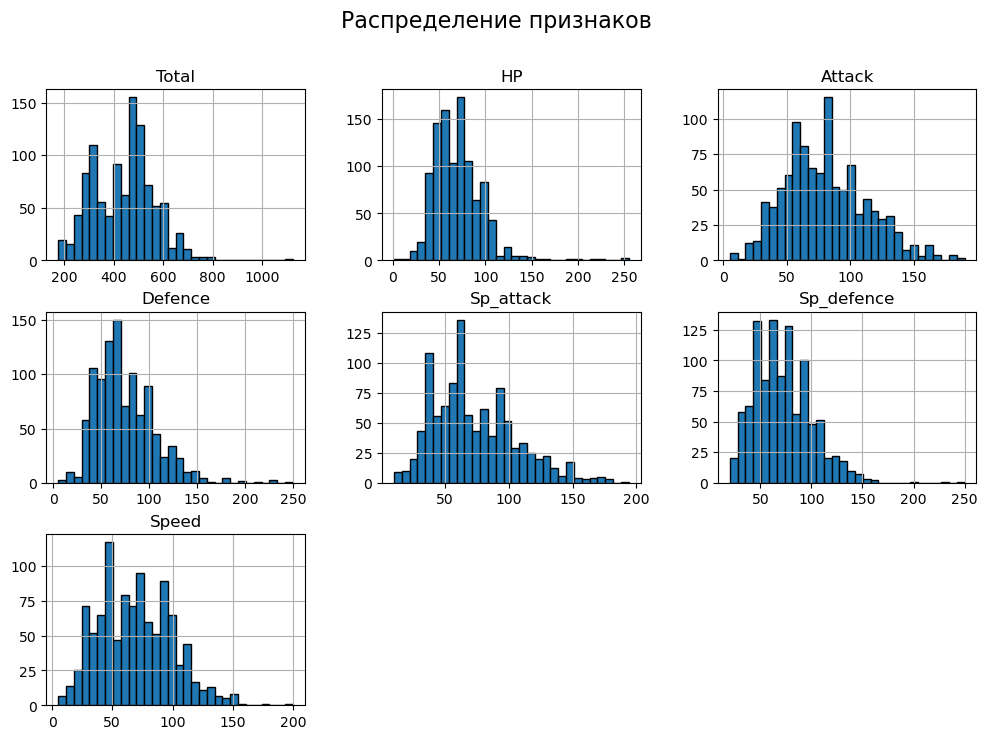

In [29]:
# Гистограммы для числовых переменных
df_numeric = df.drop(columns=['Name'])
df_numeric.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Распределение признаков", fontsize=16)
plt.show()

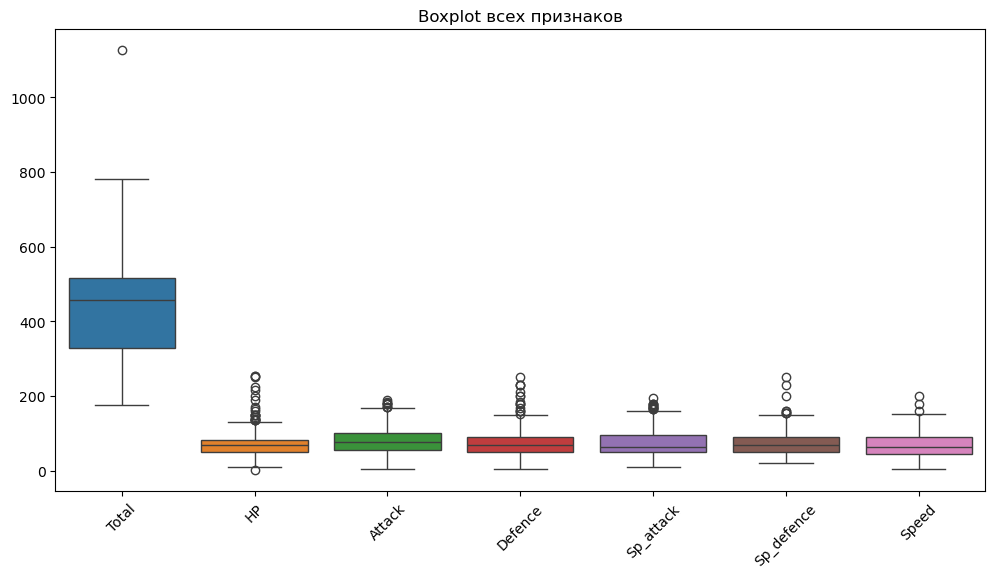

In [30]:
# Boxplot для числовых переменных
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=45)
plt.title("Boxplot всех признаков")
plt.show()

In [31]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
print("\nПервые 5 строк нормализованных данных:")
print(df_scaled.head())


Первые 5 строк нормализованных данных:
      Total        HP    Attack   Defence  Sp_attack  Sp_defence     Speed
0 -0.995099 -0.940331 -0.971259 -0.821871  -0.245253   -0.259758 -0.788447
1 -0.281471 -0.377661 -0.570001 -0.373483   0.213335    0.274797 -0.291686
2  0.702843  0.372564  0.047318  0.267071   0.824785    0.987537  0.370661
3  1.523104  0.372564  0.602905  1.548180   1.497380    1.700278  0.370661
4 -1.068923 -1.165398 -0.878661 -1.014037  -0.398115   -0.794313 -0.126100


In [32]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)

C:\Users\artembruh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [33]:
# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

In [34]:
# Агломеративная кластеризация
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(df_scaled)

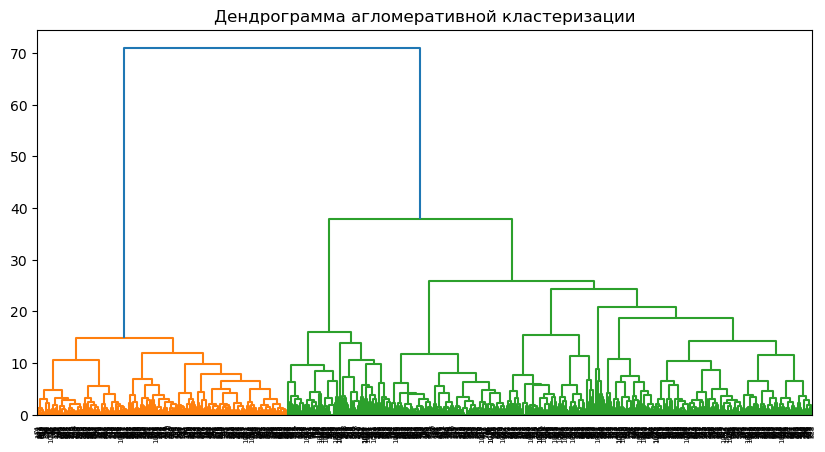

In [35]:
# Визуализация дендрограммы для агломеративной кластеризации
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Дендрограмма агломеративной кластеризации")
plt.show()

In [36]:
# --- 7. Сравнение методов ---
def plot_clusters(labels, title):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(df_scaled)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar()
    plt.show()

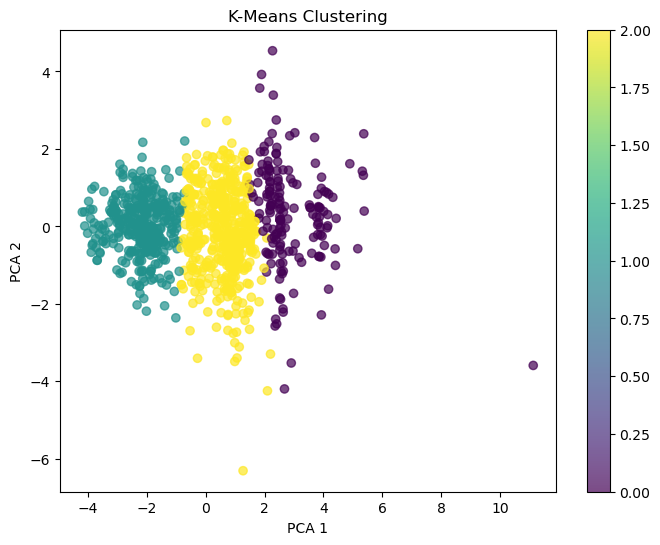

In [37]:
plot_clusters(kmeans_labels, "K-Means Clustering")

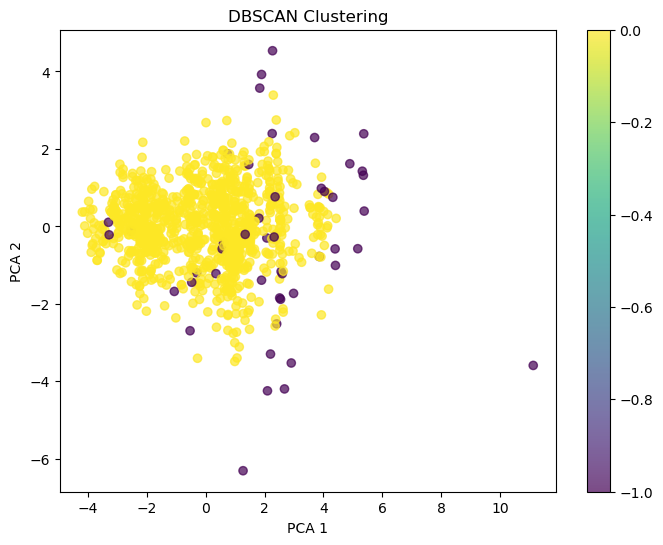

In [38]:
plot_clusters(dbscan_labels, "DBSCAN Clustering")

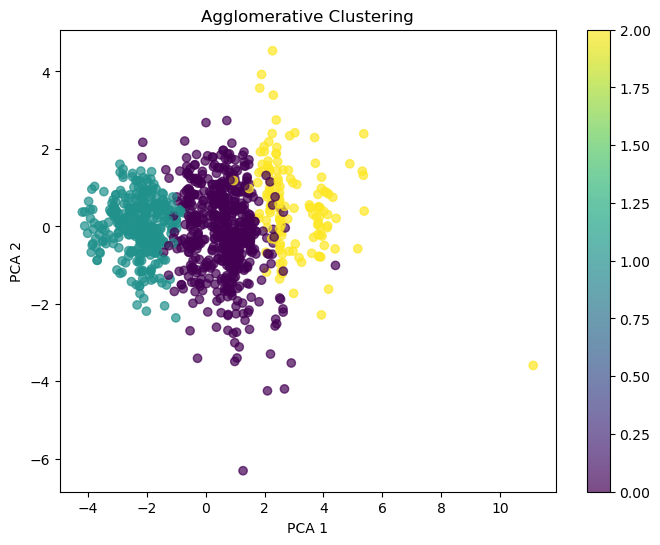

In [39]:
plot_clusters(agglo_labels, "Agglomerative Clustering")

Сравнение методов:<br>
- K-Means: Разделяет данные на четкие кластеры, но чувствителен к выбору k. Лучше работает на данных с хорошо разделяемыми кластерами.<br>
- DBSCAN: Хорош для обнаружения шумов и кластеров произвольной формы, но чувствителен к eps. Может игнорировать выбросы.<br>
- Agglomerative: Иерархический подход, может показать связи между объектами. Позволяет визуализировать структуру кластеров с помощью дендрограммы.<br>